## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [102]:
#import the useful libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [103]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("https://raw.githubusercontent.com/antrikshec48/EDA-Banking-dataset/main/bank_marketing_updated_v1.csv")

In [104]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0.columns = inp0.iloc[1]
inp0=inp0.iloc[2:-1,:]

In [6]:
inp0.head()

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 2 to 45211
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45210 non-null  object
 1   age         45190 non-null  object
 2   salary      45210 non-null  object
 3   balance     45210 non-null  object
 4   marital     45210 non-null  object
 5   jobedu      45210 non-null  object
 6   targeted    45210 non-null  object
 7   default     45210 non-null  object
 8   housing     45210 non-null  object
 9   loan        45210 non-null  object
 10  contact     45210 non-null  object
 11  day         45210 non-null  object
 12  month       45160 non-null  object
 13  duration    45210 non-null  object
 14  campaign    45210 non-null  object
 15  pdays       45210 non-null  object
 16  previous    45210 non-null  object
 17  poutcome    45210 non-null  object
 18  response    45180 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [12]:
#convert the age variable data type from float to integer.
inp0["age"]= inp0["age"].astype("float")


In [13]:
#print the average age of customers.
round(inp0.age.mean(),0)

41.0

#### Dropping customer id column. 

In [14]:
#drop the customer id as it is of no use.
inp0.drop("customerid", axis=1, inplace = True)
inp0.head()

1,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
5,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
6,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [15]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0["jobedu"].apply(lambda x: x.split(",")[0])


In [16]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0["jobedu"].apply(lambda x: x.split(",")[1])

In [17]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu",axis=1,inplace=True)

In [18]:
inp0.head()

1,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
3,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
4,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
5,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
6,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [19]:
inp0['month'] = inp0.month.apply(lambda x: x.split(",")[0] )

AttributeError: 'float' object has no attribute 'split'

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [23]:
#count the missing values in age column.
inp0['age'].isnull().sum()

20

In [21]:
#pring the shape of dataframe inp0
inp0.shape

(45210, 19)

In [31]:
#calculate the percentage of missing values in age column.\

round((inp0.age.isnull().sum()/45210)*100,3) 

0.044

Drop the records with age missing. 

In [27]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()]
inp1.shape

(45190, 19)

In [28]:
inp1.age.isnull().sum()

0

#### handling missing values in month column

In [29]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [32]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True)

may, 2017    0.304386
jul, 2017    0.152525
aug, 2017    0.138126
jun, 2017    0.118144
nov, 2017    0.087860
apr, 2017    0.064909
feb, 2017    0.058618
jan, 2017    0.031059
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [33]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

In [34]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)

In [35]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [36]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [37]:
#calculate the percentage of missing values in response column. 
30 / (inp1.response.count())

0.0006643046944198405

Target variable is better of not imputed.
- Drop the records with missing values.

In [38]:
#drop the records with response missings in inp1.
inp1 = inp1[~inp1.response.isnull()]

In [39]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

1
age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [40]:
#describe the age variable in inp1.
inp1.age.describe()

count    45160.000000
mean        40.935850
std         10.618891
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

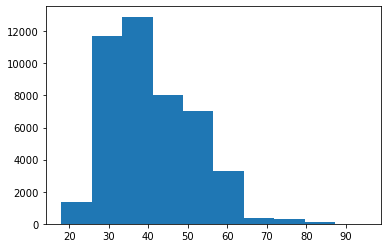

In [43]:
#plot the histogram of age variable.
plt.hist(inp1.age)
plt.show()

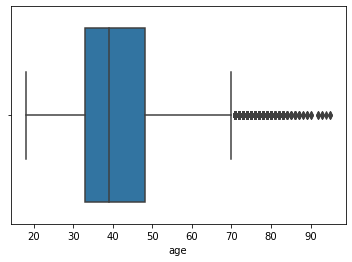

In [44]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [45]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45160
unique       22
top       20000
freq       7282
Name: salary, dtype: object

In [46]:
inp1.salary = inp1.salary.astype("int32")
inp1.balance = inp1.balance.astype("int32")
inp1.day = inp1.day.astype("int32")

In [47]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45160 entries, 2 to 45211
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45160 non-null  float64
 1   salary     45160 non-null  int32  
 2   balance    45160 non-null  int32  
 3   marital    45160 non-null  object 
 4   targeted   45160 non-null  object 
 5   default    45160 non-null  object 
 6   housing    45160 non-null  object 
 7   loan       45160 non-null  object 
 8   contact    45160 non-null  object 
 9   day        45160 non-null  int32  
 10  month      45160 non-null  object 
 11  duration   45160 non-null  object 
 12  campaign   45160 non-null  object 
 13  pdays      45160 non-null  object 
 14  previous   45160 non-null  object 
 15  poutcome   45160 non-null  object 
 16  response   45160 non-null  object 
 17  job        45160 non-null  object 
 18  education  45160 non-null  object 
dtypes: float64(1), int32(3), object(15)
memory usa

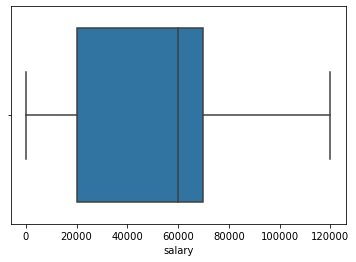

In [48]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [49]:
#describe the balance variable of inp1.
inp1.describe()

1,age,salary,balance,day
count,45160.000000,45160.000000,45160.000000,45160.000000
mean,40.935850,57003.454384,1362.815080,15.806997
std,10.618891,32086.684730,3045.963913,8.322844
min,18.000000,0.000000,-8019.000000,1.000000
25%,33.000000,20000.000000,72.000000,8.000000
50%,39.000000,60000.000000,448.000000,16.000000
75%,48.000000,70000.000000,1428.000000,21.000000
max,95.000000,120000.000000,102127.000000,31.000000


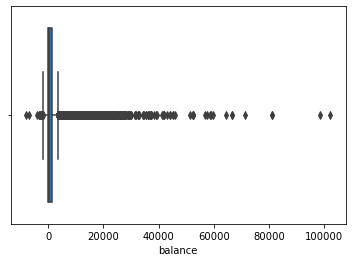

In [50]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)
plt.show()

In [51]:
#plot the boxplot of balance variable after scaling in 8:2.


In [52]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.00
0.70     1126.00
0.90     3576.00
0.95     5769.00
0.99    13173.61
Name: balance, dtype: float64

In [53]:
inp1[inp1.balance>15000].describe()

1,age,salary,balance,day
count,351.000000,351.000000,351.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792
std,12.114333,34378.272805,12128.560693,8.101819
min,23.000000,0.000000,15030.000000,1.000000
25%,35.000000,50000.000000,17074.000000,9.000000
50%,44.000000,60000.000000,20723.000000,18.000000
75%,55.000000,100000.000000,26254.000000,21.000000
max,84.000000,120000.000000,102127.000000,31.000000


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [54]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45160
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [55]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply(lambda x: float(x.split()[0])/60  if x.find("sec")>0  else float(x.split()[0]))

In [56]:
#describe the duration variable
inp1.duration.describe()

count    45160.000000
mean         4.302736
std          4.293169
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


In [57]:
inp1.dtypes

1
age          float64
salary         int32
balance        int32
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int32
month         object
duration     float64
campaign      object
pdays         object
previous      object
poutcome      object
response      object
job           object
education     object
dtype: object

#### Marital status 

In [58]:
#calculate the percentage of each marital status category. 

inp1.marital.value_counts(normalize=True)


married     0.601949
single      0.282950
divorced    0.115102
Name: marital, dtype: float64

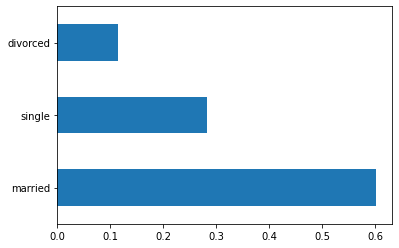

In [59]:
#plot the bar graph of percentage marital status categories

inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()


#### Job  

In [60]:
#calculate the percentage of each job status category.

inp1.job.value_counts(normalize=True)


blue-collar      0.215279
management       0.209278
technician       0.168047
admin.           0.114371
services         0.091851
retired          0.050089
self-employed    0.034854
entrepreneur     0.032839
unemployed       0.028831
housemaid        0.027414
student          0.020771
unknown          0.006377
Name: job, dtype: float64

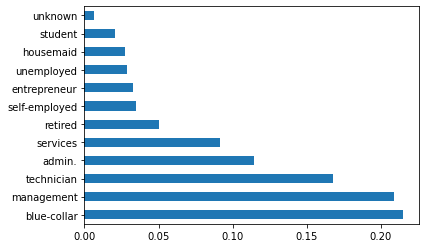

In [61]:
#plot the bar graph of percentage job categories

inp1.job.value_counts(normalize=True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

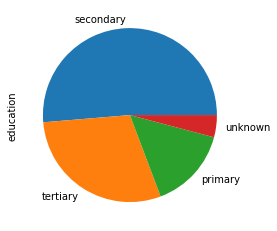

In [62]:
#calculate the percentage of each education category.

inp1['education'].value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

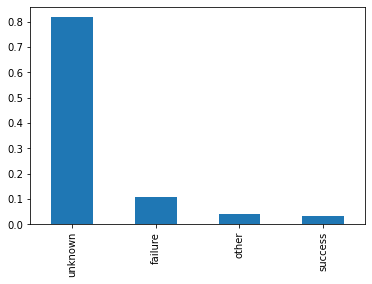

In [63]:
#calculate the percentage of each poutcome category.

inp1['poutcome'].value_counts(normalize=True).plot.bar()
plt.show()


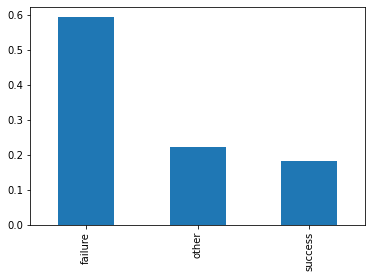

In [64]:
inp1[~(inp1['poutcome']=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()


#### Response the target variable 

In [67]:
#calculate the percentage of each response category.

inp1.response.value_counts(normalize=True)

no     0.882972
yes    0.117028
Name: response, dtype: float64

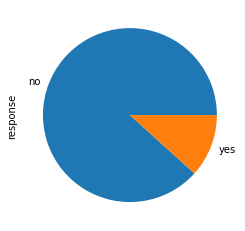

In [66]:
#plot the pie chart of response categories

inp1.response.value_counts(normalize=True).plot.pie()
plt.show()


## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

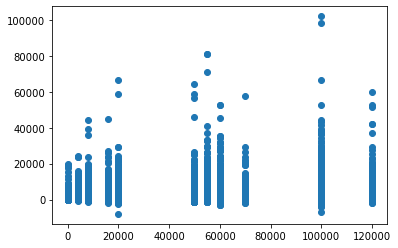

In [68]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary,inp1.balance)
plt.show()

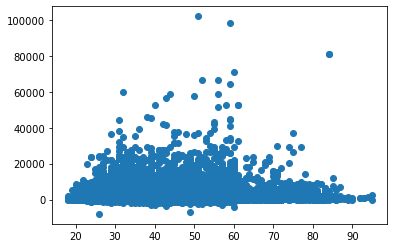

In [69]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp1.age,inp1.balance)
plt.show()

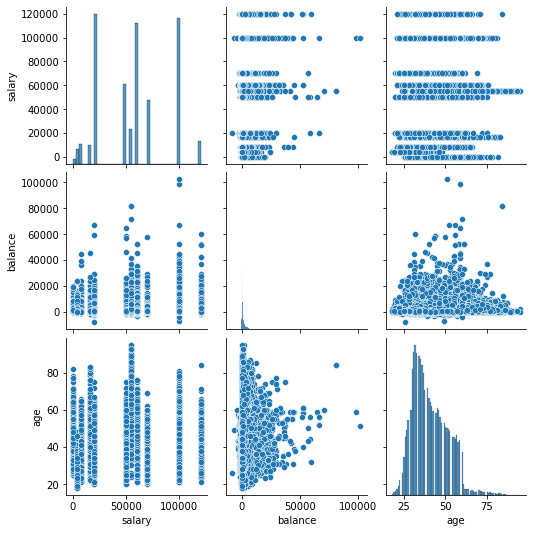

In [70]:
#plot the pair plot of salary, balance and age in inp1 dataframe.

sns.pairplot(data=inp1, vars=['salary','balance','age'])
plt.show()

#### Correlation heat map 

In [71]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.

inp1[['age','salary','balance']].corr()

1,age,salary,balance
1,,,
age,1.000000,0.024530,0.097715
salary,0.024530,1.000000,0.055468
balance,0.097715,0.055468,1.000000


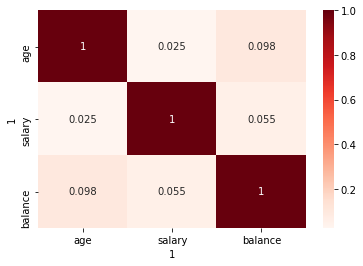

In [72]:
sns.heatmap(inp1[['age','salary','balance']].corr(),annot = True,cmap='Reds')
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [73]:
#groupby the response to find the mean of the salary with response no & yes seperatly.

inp1.groupby('response')['salary'].mean()


response
no     56767.924765
yes    58780.510880
Name: salary, dtype: float64

In [74]:
#groupby the response to find the median of the salary with response no & yes seperatly.

inp1.groupby('response')['salary'].median()


response
no     60000
yes    60000
Name: salary, dtype: int32

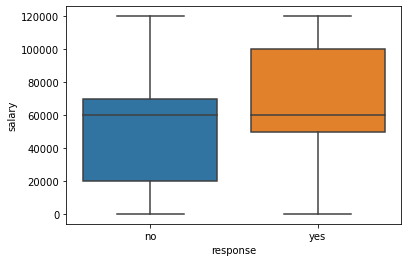

In [75]:
#plot the box plot of salary for yes & no responses.

sns.boxplot(data=inp1, x='response', y='salary')
plt.show()

#### Balance vs response 

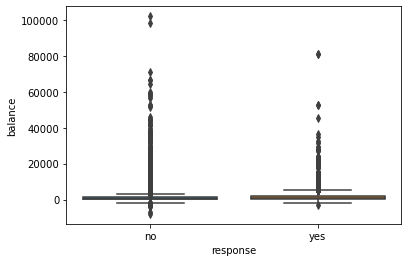

In [76]:
#plot the box plot of balance for yes & no responses.

sns.boxplot(data=inp1, x='response', y = 'balance')
plt.show()

In [77]:
#groupby the response to find the mean of the balance with response no & yes seperatly.

inp1.groupby('response')['balance'].mean()

response
no     1304.250483
yes    1804.681362
Name: balance, dtype: float64

In [78]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int32

##### 75th percentile 

In [79]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [80]:
#calculate the mean, median and 75th percentile of balance with response

inp1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.250483,417,1345
yes,1804.681362,733,2159


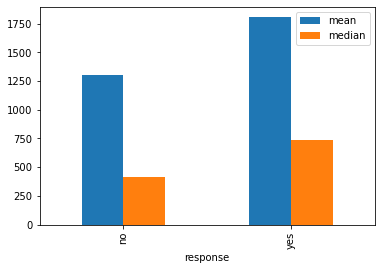

In [81]:
#plot the bar graph of balance's mean an median with response.


inp1.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()


#### Education vs salary 

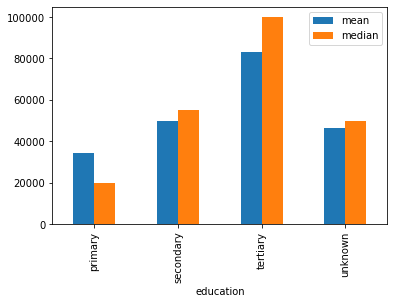

In [82]:
#groupby the education to find the mean of the salary education category.

inp1.groupby('education')['salary'].aggregate(["mean",'median']).plot.bar()
plt.show()

#### Job vs salary

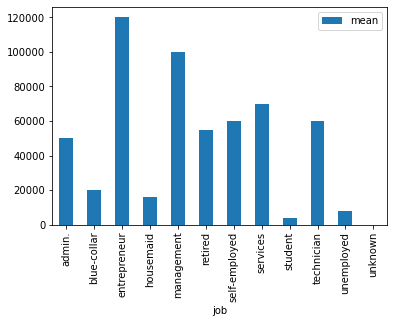

In [83]:
#groupby the job to find the mean of the salary for each job category.

inp1.groupby('job')['salary'].aggregate(['mean']).plot.bar()
plt.show()


### Segment- 5, Categorical categorical variable 

In [84]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0

inp1['response_flag'] = np.where(inp1.response=="yes",1,0)
inp1.response_flag.value_counts()

0    39875
1     5285
Name: response_flag, dtype: int64

In [85]:
inp1.response_flag.value_counts(normalize=True)

0    0.882972
1    0.117028
Name: response_flag, dtype: float64

#### Education vs response rate

<AxesSubplot:xlabel='education'>

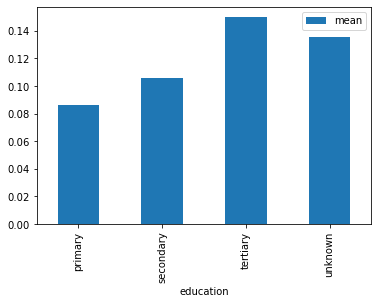

In [86]:
#calculate the mean of response_flag with different education categories.

inp1.groupby('education')['response_flag'].aggregate(['mean']).plot.bar()

#### Marital vs response rate 

In [87]:
#calculate the mean of response_flag with different marital status categories.


inp1.groupby('marital')['response_flag'].mean()


marital
divorced    0.119469
married     0.101273
single      0.149554
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='marital'>

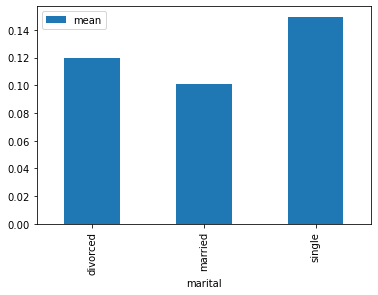

In [88]:
#plot the bar graph of marital status with average value of response_flag

inp1.groupby('marital')['response_flag'].aggregate(['mean']).plot.bar()


In [89]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45160 entries, 2 to 45211
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            45160 non-null  float64
 1   salary         45160 non-null  int32  
 2   balance        45160 non-null  int32  
 3   marital        45160 non-null  object 
 4   targeted       45160 non-null  object 
 5   default        45160 non-null  object 
 6   housing        45160 non-null  object 
 7   loan           45160 non-null  object 
 8   contact        45160 non-null  object 
 9   day            45160 non-null  int32  
 10  month          45160 non-null  object 
 11  duration       45160 non-null  float64
 12  campaign       45160 non-null  object 
 13  pdays          45160 non-null  object 
 14  previous       45160 non-null  object 
 15  poutcome       45160 non-null  object 
 16  response       45160 non-null  object 
 17  job            45160 non-null  object 
 18  educat

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

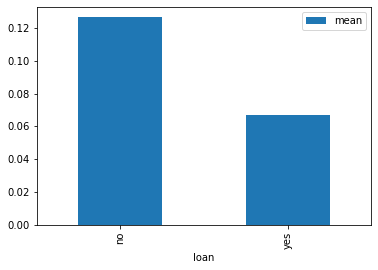

In [90]:
#plot the bar graph of personal loan status with average value of response_flag

inp1.groupby('loan')['response_flag'].aggregate(['mean']).plot.bar()

#### Housing loans vs response rate 

<AxesSubplot:xlabel='housing'>

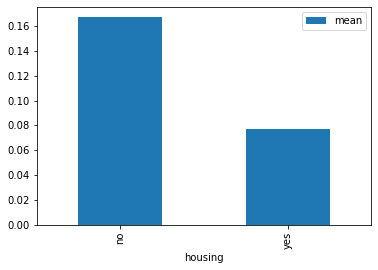

In [91]:
#plot the bar graph of housing loan status with average value of response_flag

inp1.groupby('housing')['response_flag'].aggregate(['mean']).plot.bar()


#### Age vs response 

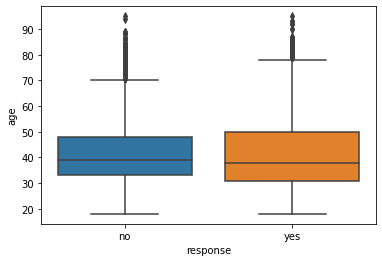

In [92]:
#plot the boxplot of age with response_flag

sns.boxplot(data=inp1, x="response", y="age")
plt.show()

##### making buckets from age columns 

In [93]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.

inp1['age_group']=pd.cut(inp1.age,[0,30,40,50,60,999], labels=["<30","30-40","40-50","50-60","60+"])
inp1.age_group.value_counts()


30-40    17661
40-50    11231
50-60     8057
<30       7025
60+       1186
Name: age_group, dtype: int64

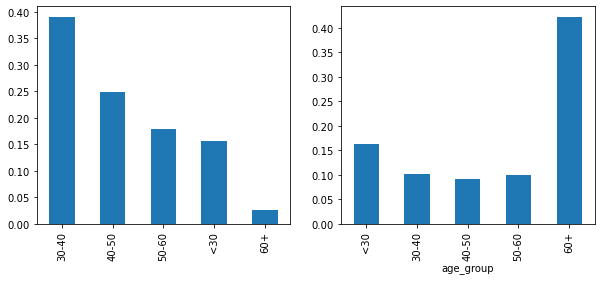

In [94]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

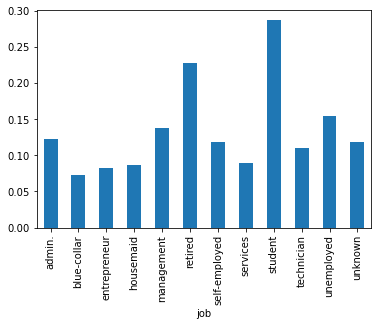

In [95]:
#plot the bar graph of job categories with response_flag mean value.

inp1.groupby('job')['response_flag'].mean().plot.bar()
plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [96]:
#create heat map of education vs marital vs response_flag

res = pd.pivot_table(data=inp1, index="education", columns ="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094656,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


<AxesSubplot:xlabel='marital', ylabel='education'>

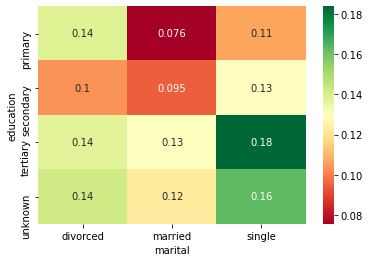

In [97]:
sns.heatmap(res, annot=True, cmap="RdYlGn")

#### Job vs marital vs response 

In [98]:
#create the heat map of Job vs marital vs response_flag.

res1 = pd.pivot_table(data = inp1, index = "job", columns="marital", values="response_flag")
res1

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075914,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


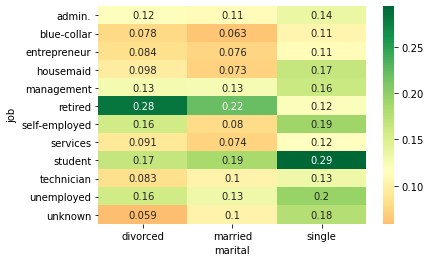

In [99]:
sns.heatmap(res1, annot=True, cmap="RdYlGn", center =0.117)
plt.show()

#### Education vs poutcome vs response

In [100]:
#create the heat map of education vs poutcome vs response_flag.

res2 = pd.pivot_table(data = inp1, index = "education", columns="poutcome", values="response_flag")
res2


poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140974,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


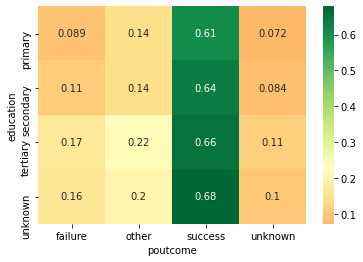

In [101]:
sns.heatmap(res2, annot=True, cmap="RdYlGn", center = 0.2308)
plt.show()